# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [54]:
# you are free to use any package you deem fit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


## Dataset

In [55]:
# DO NOT MODIFY
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# X contains a list of two features of the moon
# Y contains what type of moon it is

# DO NOT MODIFY
X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

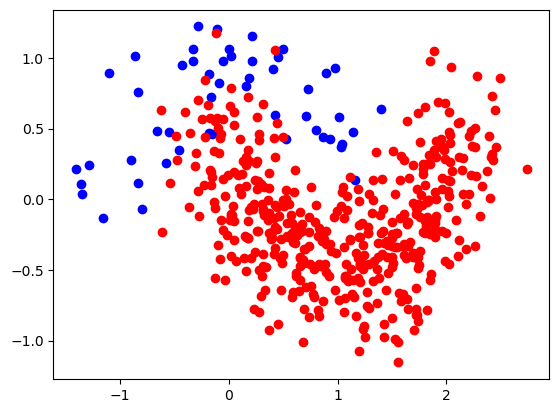

In [56]:

plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Class 0')

#visualizing the two types of moons as red and blue 

In [57]:
data = {'Feature 1': X[:, 0], 'Feature 2': X[:, 1], 'Moon_Class' : Y}
df = pd.DataFrame(data)
#making sure there were actually some zeros
df[0:30]

,Feature 1,Feature 2,Moon_Class
0,1.569404,-0.133388,1
1,0.496307,0.443235,1
2,1.783240,-0.230247,1
3,0.551058,-0.037493,1
4,0.257809,0.583334,1
5,1.798797,-0.238084,1
6,1.768833,0.030398,1
7,0.256431,0.270218,1
8,-0.159323,0.157368,1
9,1.805542,-0.153015,1


In [58]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [59]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

## Training

In [60]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


2023-09-13 21:42:34.320849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-13 21:42:34.332336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [61]:
# run the untrained model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 25ms/step


2023-09-13 21:42:34.432909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 0.703],
       [-0.894],
       [-0.962],
       [ 2.166],
       [-1.256],
       [ 0.816],
       [ 1.86 ],
       [ 1.553],
       [-1.268],
       [ 2.415]], dtype=float32)

In [62]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.088],
       [ 0.614],
       [-0.51 ]], dtype=float32)>

In [63]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [64]:
%%time
history = linear_model.fit(
    train_features,
    train_features,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

2023-09-13 21:42:35.273705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-13 21:42:35.410334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


CPU times: user 3.55 s, sys: 1.34 s, total: 4.9 s
Wall time: 4.54 s


## Testing / Optimization

In [65]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.549154,0.559932,95
96,0.548124,0.551131,96
97,0.550220,0.551798,97
98,0.548683,0.558082,98
99,0.551987,0.553747,99


In [68]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_features, verbose=0)

## Performance Analysis